In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *

In [85]:
data = pd.read_csv('https://raw.githubusercontent.com/ktxdev/mind-matters/refs/heads/master/data/raw/train.csv')
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [86]:
data.drop(columns=['id', 'Name'], inplace=True)

In [87]:
data.dtypes

Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [88]:
data['Academic Pressure'] = data['Academic Pressure'].astype('object')
data['Work Pressure'] = data['Work Pressure'].astype('object')
data['Study Satisfaction'] = data['Study Satisfaction'].astype('object')
data['Job Satisfaction'] = data['Job Satisfaction'].astype('object')
data['Work/Study Hours'] = data['Work/Study Hours'].astype('object')
data['Financial Stress'] = data['Financial Stress'].astype('object')

In [89]:
data.dtypes

Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                         object
Work Pressure                             object
CGPA                                     float64
Study Satisfaction                        object
Job Satisfaction                          object
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                          object
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [90]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

columns_to_encode = ['Academic Pressure','Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Apply LabelEncoder to each column
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

In [91]:
data = pd.get_dummies(data, columns=['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 
                                     'Working Professional or Student', 'Have you ever had suicidal thoughts ?', 
                                     'Family History of Mental Illness'], drop_first=True)

In [92]:
data.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,...,Degree_S.Tech,Degree_UX/UI Designer,Degree_Unite,Degree_Veda,Degree_Vivaan,Degree_Vrinda,Degree_Working Professional,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,49.0,5,4,NaN,5,1,1,1,0,False,...,False,False,False,False,False,False,False,True,False,False
1,26.0,5,3,NaN,5,2,7,2,1,True,...,False,False,False,False,False,False,False,True,True,False
2,33.0,4,5,8.97,1,5,3,0,1,True,...,False,False,False,False,False,False,False,False,True,False
3,22.0,5,4,NaN,5,0,10,0,1,True,...,False,False,False,False,False,False,False,True,True,True
4,30.0,5,0,NaN,5,0,9,3,0,False,...,False,False,False,False,False,False,False,True,True,True


In [81]:
categorical_features = ['City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']

In [82]:
data['Financial_Work_Interaction'] = data['Financial Stress'] * data['Work/Study Hours']
data['Academic_Financial_Interaction'] = data['Academic Pressure'] * data['Financial Stress']
data['Family_Suicidal_Interaction'] = data['Have you ever had suicidal thoughts ?_Yes'] * data['Family History of Mental Illness_Yes']

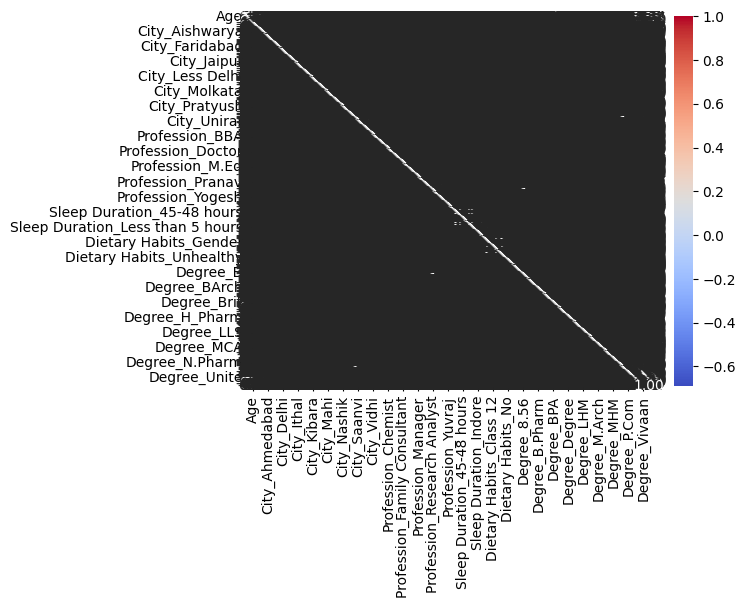

<Figure size 6000x1800 with 0 Axes>

In [93]:
numerical_features=['Age','CGPA','Academic Pressure','Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
sns.heatmap(data.corr(), fmt=".2f", cmap="coolwarm", annot=True)
plt.figure(figsize=(60, 18))
plt.show()

In [94]:
data.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,...,Degree_S.Tech,Degree_UX/UI Designer,Degree_Unite,Degree_Veda,Degree_Vivaan,Degree_Vrinda,Degree_Working Professional,Working Professional or Student_Working Professional,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,49.0,5,4,NaN,5,1,1,1,0,False,...,False,False,False,False,False,False,False,True,False,False
1,26.0,5,3,NaN,5,2,7,2,1,True,...,False,False,False,False,False,False,False,True,True,False
2,33.0,4,5,8.97,1,5,3,0,1,True,...,False,False,False,False,False,False,False,False,True,False
3,22.0,5,4,NaN,5,0,10,0,1,True,...,False,False,False,False,False,False,False,True,True,True
4,30.0,5,0,NaN,5,0,9,3,0,False,...,False,False,False,False,False,False,False,True,True,True


In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[['Age','CGPA']] = scaler.fit_transform(data[['Age','CGPA']])

In [98]:
save_data(data, 'cleaned', 'train')

Dataframe saved!
